firls函数在Python中期望滤波器阶数（numtaps）为奇数，这与MATLAB中的用法略有不同。在MATLAB中，当你指定阶数为N时，实际上创建的滤波器系数个数是N+1，而在Python的scipy.signal.firls中，你需要直接指定滤波器系数个数，这个数必须是奇数。

在你的例子中，MATLAB函数调用firls(255,[0 0.25 0.3 1],[1 1 0 0])实际上生成了一个256阶（系数个数为257）的滤波器。所以在Python中，你需要调整firls函数的第一个参数，让它表示系数个数，并且为奇数。这样，你应该调用firls(257, [0, 0.25, 0.3, 1], [1, 1, 0, 0])来创建一个等效的滤波器。

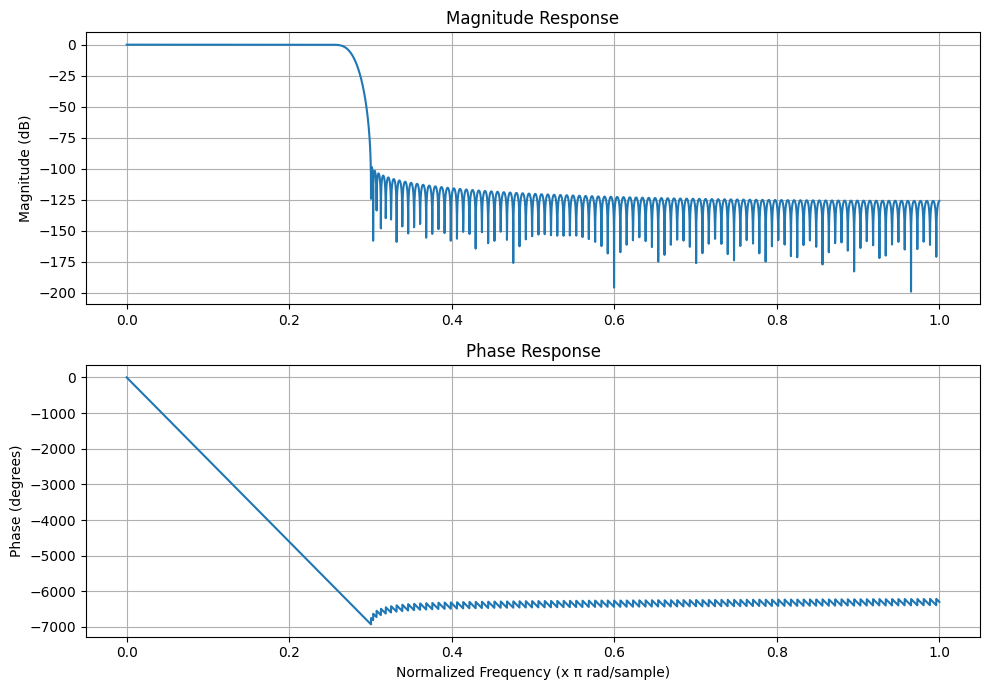

In [2]:
from scipy.signal import firls, freqz
import matplotlib.pyplot as plt
import numpy as np

# 设计滤波器
b = firls(257, [0, 0.25, 0.3, 1], [1, 1, 0, 0])

# 计算频率响应
w, h = freqz(b, 1, worN=8000)

# 绘制频率响应
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

# 幅度响应
axs[0].plot(w / np.pi, 20 * np.log10(abs(h)))
axs[0].set_title('Magnitude Response')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid()

# 相位响应
axs[1].plot(w / np.pi, np.unwrap(np.angle(h)) * (180 / np.pi))
axs[1].set_title('Phase Response')
axs[1].set_ylabel('Phase (degrees)')
axs[1].set_xlabel('Normalized Frequency (x π rad/sample)')
axs[1].grid()

plt.tight_layout()
plt.show()



请注意，滤波器的阶数在Python中需要是滤波器系数的个数，而不是MATLAB中的阶数，所以使用了31而不是30（因为您想要一个30阶的滤波器，系数个数应该是31）。

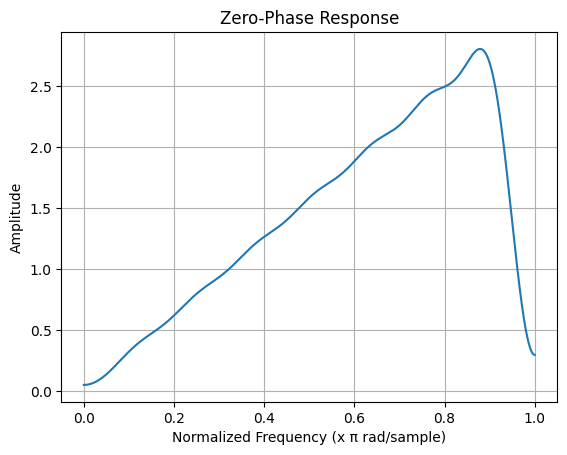

In [4]:
from scipy.signal import firls, freqz
import matplotlib.pyplot as plt
import numpy as np

# 设计微分器
# 滤波器的系数数量设为31，因此在MATLAB中对应的滤波器阶数为30
b = firls(31, [0, 0.9, 0.9, 1], [0, 0.9*np.pi, 0.9*np.pi, 0])

# 计算频率响应
w, h = freqz(b, worN=8000)
amplitude = np.abs(h)  # 零相位响应的振幅

# 绘制零相位响应
plt.plot(w / np.pi, amplitude)  # 用π标准化频率
plt.title('Zero-Phase Response')
plt.xlabel('Normalized Frequency (x π rad/sample)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

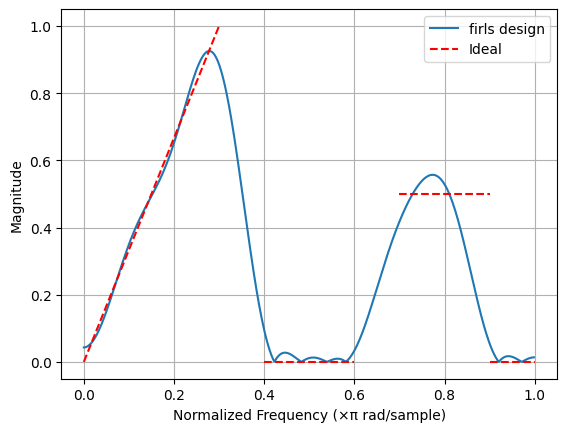

In [14]:
from scipy.signal import firls, freqz
import matplotlib.pyplot as plt
import numpy as np

# 设定频率和振幅，确保设计是反对称的
F = [0, 0.3, 0.4, 0.6, 0.7, 0.9, 0.9, 1] 
A = [0, 1.0, 0.0, 0.0, 0.5, 0.5, 0, 0]
# 对于希尔伯特变换器，我们需要滤波器系数的数量是奇数，因此阶数（numtaps-1）应该是偶数
numtaps = 25

# 频率响应的权重，提高0.9之后的权重以实现更陡峭的截止
weights = [1] * 3 + [100]

b = firls(numtaps, F, A, weight=weights, fs=2)

# 计算并绘制频率响应
w, h = freqz(b, worN=512)
f = w / np.pi
plt.plot(f, np.abs(h))

# 绘制理想的频率响应
for i in range(0, len(F), 2):
    plt.plot(F[i:i+2], A[i:i+2], 'r--')

plt.legend(['firls design', 'Ideal'])
plt.grid(True)
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.show()


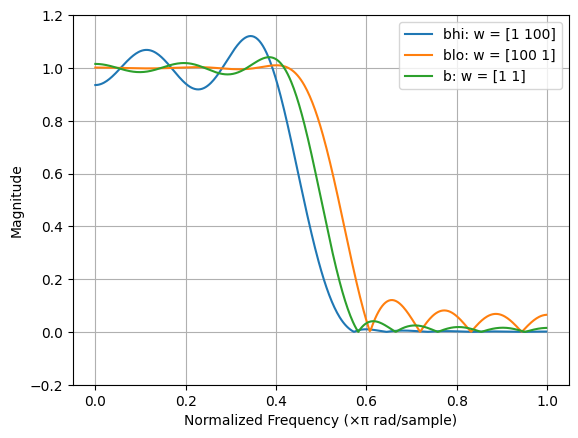

In [21]:
from scipy.signal import firls, freqz
import matplotlib.pyplot as plt
import numpy as np

# 设定频率点和对应的振幅值
freq_points = [0, 0.45, 0.55, 1]
desired_amplitude = [1, 1, 0, 0]

# 设计三个滤波器，使用不同的权重
weights_bhi = [1, 100]  # 停带权重高
bhi = firls(19, freq_points, desired_amplitude, weights_bhi, fs=2)

weights_blo = [100, 1]  # 通带权重高
blo = firls(19, freq_points, desired_amplitude, weights_blo, fs=2)

weights_b = [1, 1]  # 权重相等
b = firls(19, freq_points, desired_amplitude, weights_b, fs=2)

# 计算并绘制三个滤波器的零相位响应
w, h_bhi = freqz(bhi, worN=512)
w, h_blo = freqz(blo, worN=512)
w, h_b = freqz(b, worN=512)

# 绘制零相位响应
plt.plot(w/np.pi, abs(h_bhi), label="bhi: w = [1 100]")
plt.plot(w/np.pi, abs(h_blo), label="blo: w = [100 1]")
plt.plot(w/np.pi, abs(h_b), label="b: w = [1 1]")

plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.legend()
plt.ylim([-.2, 1.2])
plt.grid(True)
plt.show()
